# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:

**Note: if you are using the Udacity workspace, you *DO NOT* need to re-download these - they can be found in the `/data` folder as noted in the cell below.**

* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dog_images`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [2]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("data/lfw/*/*"))
dog_files = np.array(glob("data/dogImages/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


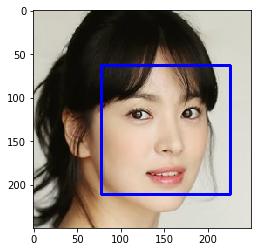

In [3]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [4]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
(You can print out your results and/or write your percentages in this cell)

In [10]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.
face_in_humanfiles = 0
for img in human_files_short:
    if face_detector(img):
        face_in_humanfiles += 1
print(f'Detected face in human files : {face_in_humanfiles*100/(len(human_files_short))}%')

        
face_in_dogfiles = 0
for img in dog_files_short:
    if face_detector(img):
        face_in_dogfiles += 1

    # Printing results
print(f'Detected face in dog files : {face_in_dogfiles*100/(len(dog_files_short))}%')
        


Detected face in human files : 96.0%
Detected face in dog files : 18.0%


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [5]:
### (Optional) 
### TODO: Test performance of anotherface detection algorithm.
### Feel free to use as many code cells as needed.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [5]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available,well its not strong enough
if not use_cuda:
    VGG16 = VGG16.cuda()

Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [8]:
from PIL import Image
import torchvision.transforms as transforms

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    transform = transforms.Compose([transforms.CenterCrop(224),
                           transforms.ToTensor(),
                           transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])
    datimg = transform(Image.open(img_path))
    datimg = datimg.unsqueeze(0)
    datimg = datimg.float()
    if not use_cuda:
        datimg = datimg.cuda()
    VGG16.eval()
    with torch.no_grad():
        imgout = VGG16(datimg)
    _, labelout = torch.topk(imgout, 1, dim=1)
    VGG16.train()
    return labelout # predicted class index

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [32]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## TODO: Complete the function.
    outlabel = VGG16_predict(img_path)
    detected = False
    if 151 <= outlabel <= 268:
        detected = True
    return detected # true/false

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__  
**- Detect 1% of dog in human_files_short**  
**- Detect 91% of dog in dog_files_short**

100%|██████████| 200/200 [00:07<00:00, 26.76it/s]


VGG16 dog detect on human files : 1.0%
VGG16 dog detect on dog files : 91.0%
False (-)
/data/dog_images/train/103.Mastiff/Mastiff_06812.jpg
/data/dog_images/train/103.Mastiff/Mastiff_06866.jpg
/data/dog_images/train/103.Mastiff/Mastiff_06844.jpg
/data/dog_images/train/103.Mastiff/Mastiff_06832.jpg
/data/dog_images/train/103.Mastiff/Mastiff_06835.jpg
/data/dog_images/train/059.Doberman_pinscher/Doberman_pinscher_04207.jpg
/data/dog_images/train/059.Doberman_pinscher/Doberman_pinscher_04191.jpg
/data/dog_images/train/059.Doberman_pinscher/Doberman_pinscher_04170.jpg
/data/dog_images/train/059.Doberman_pinscher/Doberman_pinscher_04214.jpg
False (+)
/data/lfw/Perri_Shaw/Perri_Shaw_0001.jpg
One of undetected dog image :


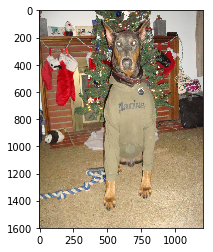

One of non-dog image with dog detection output is True :


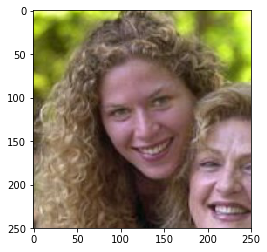

In [9]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.
from tqdm import tqdm
import matplotlib.pyplot as plt
import random

falsepos = []
falseneg = []
with tqdm(total=len(human_files_short) + len(dog_files_short)) as pbar:
    humanok = 0
    for img in human_files_short:
        pbar.update(1)
        if dog_detector(img):
            humanok += 1
            falsepos.append(img)
            
    dogok = 0
    for img in dog_files_short:
        pbar.update(1)
        if dog_detector(img):
            dogok += 1
        else:
            falseneg.append(img)

print(f'VGG16 dog detect on human files : {humanok*100/(len(human_files_short))}%')
print(f'VGG16 dog detect on dog files : {dogok*100/(len(dog_files_short))}%')
print('\n'.join(['False (-)', '\n'.join(falseneg), 'False (+)', '\n'.join(falsepos)]))

if len(falseneg) > 0:
    idx = random.randint(0, len(falseneg) - 1)
    print(f'One of undetected dog image :')
    plt.imshow(Image.open(falseneg[idx]))
    plt.show()

if len(falsepos) > 0:
    idx = random.randint(0, len(falsepos) - 1)
    print(f'One of non-dog image with dog detection output is True :')
    plt.imshow(Image.open(falsepos[idx]))
    plt.show()


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [10]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dog_images/train`, `dog_images/valid`, and `dog_images/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

tensor(21)


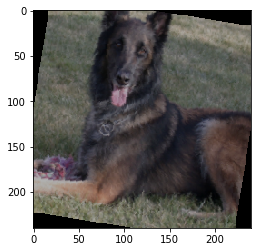

tensor(53)


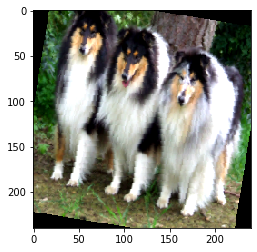

tensor(8)


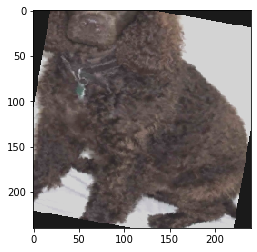

In [9]:
import os
from torchvision import datasets
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

batchsize = 64

traindir = 'data/dogImages/train/'
validdir = 'data/dogImages/valid/'
testdir = 'data/dogImages/test/'

train_transform = transforms.Compose([transforms.Resize((260, 260)),
                                      transforms.RandomResizedCrop(size=240),
                                      transforms.RandomHorizontalFlip(),
                                      transforms.RandomRotation(20),
                                      transforms.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5),
                                      transforms.ToTensor(),
                                      transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

test_transform = transforms.Compose([transforms.Resize((240, 240)),
                                     transforms.ToTensor(),
                                     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])


train_loader = torch.utils.data.DataLoader(datasets.ImageFolder(traindir, transform=train_transform),
                                           batch_size=batchsize,
                                           shuffle=True) # Shuffling needed to randomize input every iteration, escaping from local minima from input perturbation
valid_loader = torch.utils.data.DataLoader(datasets.ImageFolder(validdir, transform=test_transform),
                                           batch_size=batchsize,
                                           shuffle=False) # Input doesnt need to be shuffled as model will be in eval mode, no concern about local minima
test_loader = torch.utils.data.DataLoader(datasets.ImageFolder(testdir, transform=test_transform),
                                           batch_size=batchsize,
                                           shuffle=False) # Similar to validation set

loaders_scratch = {'train':train_loader,
                  'valid':valid_loader,
                  'test':test_loader}

for idx, (checkimage, checklabel) in enumerate(train_loader):
    print(checklabel[0])
    img = checkimage[0] / 2 + 0.5
    plt.imshow(np.transpose(img, (1, 2, 0)))
    plt.show()
    if idx == 2:
        break


**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**:  
**- By resizing to 260x260 and random cropping to 240x240, bigger images will be scaled down and cropped while smaller images will be scaled up and cropped as well. Resize value (260) and output of random cropping (240) are kept close, this is to prevent losing features in bigger images when number of pixels are reduced by cropping. Smaller images will have its features magnified, might require bigger kernel in convolution layer. But, there are very less images that have size less than 240, by random checking. So sticking to 3x3 kernel might be ok.**
  
**- Yes, by random horizontal flipping, random rotation, random color-jittering. Some dog images have the dog's head to the left of body and some are having the opposite way, so in case there is a class that have most of images with head on the left, the image with head on the right will still be trained as all these images will be loaded with random horizontal flipping in dataloader later on. Rotation might be necessary, as some of the train, valid and test images have some dogs in rotated position this could help to reduce misclassification due to rotated dog profiles. Color jittering will probably make the trained network to be brightness-, contrast-, and saturation-invariant** 
  
**- Normalization of tensor help to normalize intensity in images, can reduce pixel value biases**

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [12]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1) # 240 + 2 - 3 + 1 --> pool --> 240/2
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1) # 120 + 2 - 3 + 1 --> pool --> 120/2
        self.conv3 = nn.Conv2d(32, 64, 3, padding=1) # 60 + 2 - 3 + 1 --> pool --> 60/2
        self.conv4 = nn.Conv2d(64, 128, 3, padding=1) # 30 + 2 - 3 + 1 --> pool --> 30/2
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(15*15*128, 512)
        self.fc2 = nn.Linear(512, 133)
        self.dropout1 = nn.Dropout(0.35) # To reduce the chance of overfitting traindata
        self.dropout2 = nn.Dropout(0.25) # To reduce the chance of overfitting traindata
    
    def forward(self, x):
        ## Define forward behavior
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = self.pool(F.relu(self.conv4(x)))
        x = x.view(-1, 15*15*128)
        x = self.dropout1(x)
        x = F.relu(self.fc1(x))
        x = self.dropout2(x)
        x = self.fc2(x)
        return x

#-#-# You so NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__  
 - **All the 4 convolution layers are using 3x3 filters with 1-px stride and padding to maintain the image size before and after convolution. The number of filters are multiple of 2 for each layer, starting from 16 up to 16x2^3. The image after conv-maxpool layers are reduced half in size due to maxpool kernel of size 2 and stride 2. So we have 4 sameconv-maxpool layers, with the intention to extract as many high level features as possible but not reducing the final image size too much. 15 by 15 might be enough to encode high level features (from each 128 filters) which then fed into fully connected MLP. Adding more same convolution and maxpool will result in 7x7 feature images or less but higher depths, doubled to 256 or more in this case. The number of convolution layer parameters will increase by 7x7x256 or more, adding GPU payload and training time. Though it is worth to try to add more convolution layers, there is always a trade-off between network structure and hardware capability (GPU).**
  
  
 - **The FC network have 2 layers, the first layer in-features adjusted to the size of 4th convolution layer output. Then scaled down in slightly binary manner to 512 then to 133 outputs at last layer, corresponding to number of dog breed classes (ie: labels in dog Images). Dropout probability is moderately set about p=0.35 from conv net to FC net while in between the two layers in FC net there is p=0.25 dropout. The number of weights from conv net to FC net is much larger than from first layer to second layer of FC net, thus we might need to differentiate dropout probability, to have better generalization on non-train data.**

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [13]:
import torch.optim as optim
import torch.nn as nn

### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer_scratch = optim.Adam(model_scratch.parameters(), lr=0.001)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [10]:
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU, not strong enough
            if not use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            optimizer.zero_grad()
            out = model(data)
            loss = criterion(out, target)
            loss.backward()
            optimizer.step()
            train_loss += (1/(batch_idx + 1))*(loss.data - train_loss)
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU, not strong enough
            if not use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            with torch.no_grad():
                out = model(data)
                loss = criterion(out, target)
            valid_loss += (1/(batch_idx + 1))*(loss.data - valid_loss)

            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss <= valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(valid_loss_min,
                                                                                            valid_loss))
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss
            
    # return trained model
    return model

In [ ]:
# train the model
model_scratch = train(30, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')

In [14]:
# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

<All keys matched successfully>

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [11]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # disable to GPU, not strong enough
        if not use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

In [35]:
# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 3.625313


Test Accuracy: 16% (135/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [12]:
import torchvision.models as models
import torch.nn as nn
import torch
from torch import optim
import torchvision.transforms as transforms
from torchvision import datasets
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
import numpy as np
from collections import OrderedDict

use_cuda = torch.cuda.is_available()

In [13]:
## TODO: Specify data loaders
batchsize_transfer = 64

traindir = 'data/dogImages/train/'
validdir = 'data/dogImages/valid/'
testdir = 'data/dogImages/test/'

train_transform_transfer = transforms.Compose([transforms.Resize((260, 260)),
                                               transforms.RandomResizedCrop(size=224),
                                               transforms.RandomHorizontalFlip(),
                                               transforms.RandomRotation(20),
                                               transforms.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5),
                                               transforms.ToTensor(),
                                               transforms.Normalize([0.485, 0.456, 0.406],[0.229, 0.224, 0.225])])

test_transform_transfer = transforms.Compose([transforms.Resize((224, 224)),
                                              transforms.ToTensor(),
                                              transforms.Normalize([0.485, 0.456, 0.406],[0.229, 0.224, 0.225])])

train_loader_transfer = torch.utils.data.DataLoader(datasets.ImageFolder(traindir, transform=train_transform_transfer),
                                           batch_size=batchsize_transfer,
                                           shuffle=True) # Default sequence might trap loss function to local minima, 
#shuffling needed to break this default sequence so that it is perturbed enough to bounce loss function out of local minima
valid_loader_transfer = torch.utils.data.DataLoader(datasets.ImageFolder(validdir, transform=test_transform_transfer),
                                           batch_size=batchsize_transfer,
                                           shuffle=False)
test_loader_transfer = torch.utils.data.DataLoader(datasets.ImageFolder(testdir, transform=test_transform_transfer),
                                           batch_size=batchsize_transfer,
                                           shuffle=False)

loaders_transfer = {'train':train_loader_transfer,
                  'valid':valid_loader_transfer,
                  'test':test_loader_transfer}

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [14]:
## TODO: Specify model architecture



model_transfer = models.vgg16(pretrained=True)
print(model_transfer.classifier)
for param in model_transfer.parameters():
    param.requires_grad = False

# New FC for 133-class application
classifier = nn.Sequential(nn.Dropout(0.35),
                           nn.Linear(25088, 512),
                           nn.ReLU(),
                           nn.Dropout(0.25),
                           nn.Linear(512, 133))

model_transfer.classifier = classifier
print(model_transfer.classifier)

if not use_cuda:
    model_transfer = model_transfer.cuda()

Sequential(
  (0): Linear(in_features=25088, out_features=4096, bias=True)
  (1): ReLU(inplace=True)
  (2): Dropout(p=0.5, inplace=False)
  (3): Linear(in_features=4096, out_features=4096, bias=True)
  (4): ReLU(inplace=True)
  (5): Dropout(p=0.5, inplace=False)
  (6): Linear(in_features=4096, out_features=1000, bias=True)
)
Sequential(
  (0): Dropout(p=0.35, inplace=False)
  (1): Linear(in_features=25088, out_features=512, bias=True)
  (2): ReLU()
  (3): Dropout(p=0.25, inplace=False)
  (4): Linear(in_features=512, out_features=133, bias=True)
)


__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__  
**VGG16 are pretrained with dogs as noted in earlier project. These dog features have already shaped the weights in conv layer and therefore it is practical to just modify only the fully connected network to adapt with our output requirement. The rework in the model is minimal as one may just change the number of in_features and out_features to better suit application**  

**The resize transform to images must be set to 224 and normalized similar to its pretrained data which has means [0.485, 0.456, 0.406] and the standard deviations [0.229, 0.224, 0.225]**

**In the classifier modules, vgg16 originally only has three layers connecting 25088 inputs and 1000 outputs with relu activation function for all of its layers. To make this network compatible with our 133-class dog breed project, we need to modify its final FC layer to have 133 output, corresponding to number of dog breeds (classes). In total, we have only 2 layers in classifier, one less than default vgg model has, and dropout with p=0.35 after the conv net and p=0.25 after first layer of FC net.**


### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [15]:
criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optim.Adam(model_transfer.classifier.parameters(), lr=0.001)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [17]:
# train the model
model_transfer = train(10, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')

RuntimeError: [enforce fail at ..\c10\core\CPUAllocator.cpp:72] data. DefaultCPUAllocator: not enough memory: you tried to allocate 7398752256 bytes. Buy new RAM!


In [16]:
# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

<All keys matched successfully>

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [54]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 0.897044


Test Accuracy: 74% (619/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [21]:
import torch
from PIL import Image
import torchvision.transforms as transforms
import torchvision.datasets as datasets


use_cuda = torch.cuda.is_available()

In [22]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.


test_dir = 'data/dogImages/test/'
data_transfer = datasets.ImageFolder(test_dir, transform = test_transform_transfer)

# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in data_transfer.classes]

def predict_breed_transfer(img_path, predict_transform):
    # load the image and return the predicted breed
    
    test_img = predict_transform(Image.open(img_path))
    test_img = test_img.unsqueeze(0)
    test_img = test_img.float()
    
    if use_cuda:
        test_img = test_img.cuda()
          
    with torch.no_grad():
        test_img_out = model_transfer(test_img)
    _, tlabelout = torch.topk(test_img_out, 1, dim=1)
        
    return class_names[tlabelout] # predicted class index

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [23]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.
from PIL import Image
import matplotlib.pyplot as plt

def run_app(imgpth):
    ## handle cases for a human face, dog, and neither
    if dog_detector(imgpth):
        return imgpth, 'This is picture of a dog', f'Guessed it is a {predict_breed_transfer(imgpth, test_transform_transfer)}'
    elif face_detector(imgpth):
        return imgpth, 'Oh, Hello human!',f'You look like a ...{predict_breed_transfer(imgpth, test_transform_transfer)}'
    else:
        return imgpth, 'ERROR!', 'Doesnt look like a human or a dog.. wrong image?'


---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__  
**Not quite better than expected, but at least better than starting from scratch.** 

**Three possible improvements in architecture:

**(1) Using pretrained VGG16 as conv layers, the performance of dog breed predictor is expected be far better than ____. Other than retuning FC net (change dropout probability, number of neurons and possibly add another layer), other torchvision models need to be put into experiment, especially those nets that are trained with dog images or at least dog-like images. Having high level features extraction from similar object (dogs) could be massive advantage. Would be better if we inspect each conv layer output (and each filter) to see if literal dog-like features are obtained, and choose the best net that can extract as many features as usual dog have (ex: ears, noses, eyes, body, head, color, or ratio of leg to body length and ratio of head to body in higher level features etc)**  

**(2) Dog_detector can be improved by similarly finding better net than plain vgg16 with gated output to check if output falls within dog class range (151, 268). As comparisson, we have 133 classes while vgg16 has 118 classes, and those 118 classes might not overlap with 133 classes that we have in our database. Thus, many dog breeds in 133-class database are missing in vgg16 that could be undetected in vgg16. The better dog-detector can be drafted using transfer learning and combining our 133-class of dog database and various non-dog database to improve dog_detector outcome**  

**(3) Face_detector can also be replaced with either CNN net, PCA-based face detectors that have better accuracy than haar cascade above, or other deep network with reputable performance.**



####################################


Oh, Hello human!
You look like a ...Border collie


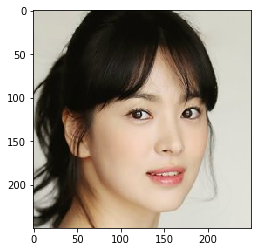



####################################


Oh, Hello human!
You look like a ...Pharaoh hound


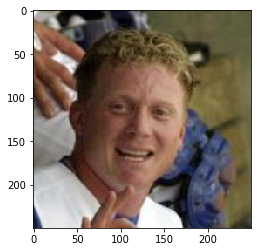



####################################


ERROR!
Doesnt look like a human or a dog.. wrong image?


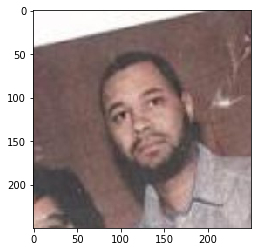



####################################


This is picture of a dog
Guessed it is a Briard


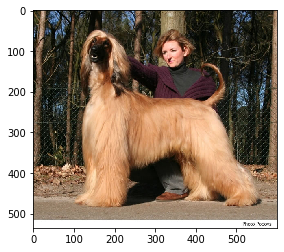



####################################


This is picture of a dog
Guessed it is a Belgian malinois


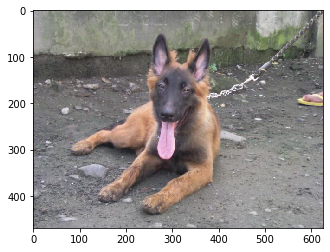



####################################


This is picture of a dog
Guessed it is a Affenpinscher


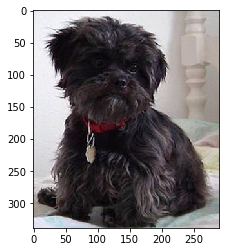



####################################


Oh, Hello human!
You look like a ...Pekingese


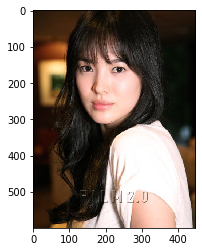



####################################


Oh, Hello human!
You look like a ...Great dane


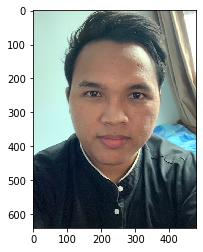



####################################


ERROR!
Doesnt look like a human or a dog.. wrong image?


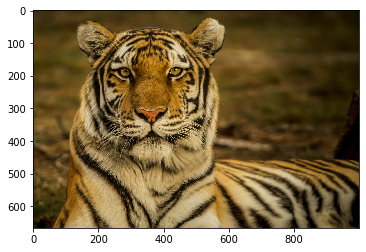

In [33]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.
otherimages = np.array(glob("otherimg/*"))

## suggested code, below
for file in np.hstack((human_files[:3], dog_files[15], dog_files[145], dog_files[884], otherimages)):
    imgpath_check, str1, str2 = run_app(file)
    print('\n\n####################################\n\n')
    print(str1)
    plt.imshow(Image.open(imgpath_check))
    plt.show
    print(str2)
    plt.pause(1)
        